In [5]:
# importing more common libraries/packages I'll use
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# importing pybaseball package that will assist in gathering stats
from pybaseball import batting_stats

In [8]:
# since I'll be focused on effects of MLB's rule changes on recent years, we'll focus on 2017-2023
# we'll exclude 2020 since it will be an outlier due to COVID

# first dataframe containing seasons 2017-2019
batting_17_19 = batting_stats(2017,2019)

# second dataframe containing seasons 2021-2023
batting_21_23 = batting_stats(2021,2023)

In [12]:
# concatenate dataframes together for one master df to work with
full_batting = pd.concat([batting_17_19, batting_21_23])
display(full_batting.head())

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,...,110.6,217,0.500,434,0.220,0.270,NaN,NaN,NaN,10.4
1,10155,2018,Mike Trout,LAA,26,140,471,608,147,80,...,118.0,162,0.460,352,0.201,0.261,NaN,NaN,NaN,9.6
5,15640,2017,Aaron Judge,NYY,25,155,542,678,154,75,...,121.1,186,0.550,338,0.157,0.290,NaN,NaN,NaN,8.3
4,10155,2019,Mike Trout,LAA,27,134,470,600,137,63,...,116.6,155,0.438,354,0.193,0.258,NaN,NaN,NaN,8.4
9,17678,2019,Alex Bregman,HOU,25,156,554,690,164,84,...,107.4,178,0.372,479,0.204,0.250,NaN,NaN,NaN,8.4


In [15]:
# batting stats dataframe looks like what we expect
# cleaning data by subsetting for more important columns
cols = ['IDfg', 'Season', 'Name', 'Team', 'Age', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP',\
        'GDP', 'SB', 'CS', 'AVG', 'GB', 'FB', 'LD', 'IFFB', 'Pitches', 'Balls', 'Strikes', 'IFH', 'BUH', 'OBP', 'SLG', 'OPS', 'L-WAR']
cleaned_batting = full_batting[cols]

In [34]:
# now this cleaned dataframe should have the required batting trends most likely impacted by
# the recent MLB rule changes

# first metric we'll analyze: total successful hits grouped by team and season - we'll visualize this as well
team_hits = cleaned_batting.groupby(['Season', 'Team'])['H'].sum().reset_index()

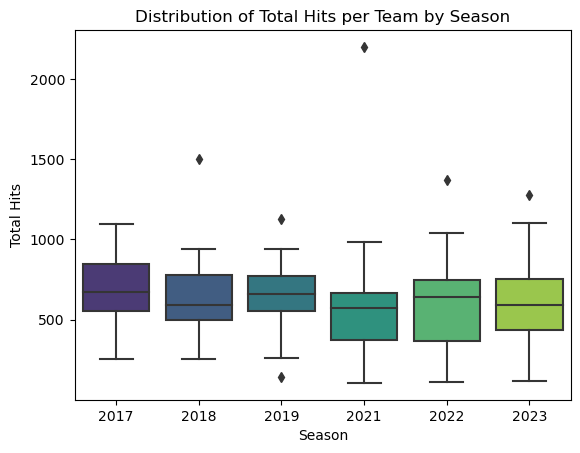

In [32]:
sns.set_palette('viridis')
sns.boxplot(x = 'Season', y = 'H', data = team_hits)
plt.ylabel('Total Hits')
plt.title('Distribution of Total Hits per Team by Season')
plt.show()

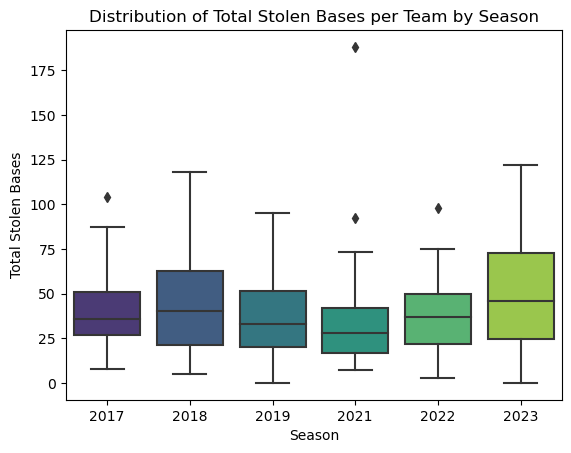

In [35]:
# now let's repeat the process for some other key metrics: stolen bases, total pitches thrown, pitches thrown per game

# stolen bases across the years
team_sb = cleaned_batting.groupby(['Season', 'Team'])['SB'].sum().reset_index()

sns.set_palette('viridis')
sns.boxplot(x = 'Season', y = 'SB', data = team_sb)
plt.ylabel('Total Stolen Bases')
plt.title('Distribution of Total Stolen Bases per Team by Season')
plt.show()

In [36]:
# total pitches thrown by each team per season, and pitches per game played
# for these metrics, we'll need to import another pybaseball library
from pybaseball import pitching_stats

# grab pitcher data for same seasons and concat in the same manner
pitching_17_19 = pitching_stats(2017, 2019)
pitching_21_23 = pitching_stats(2021, 2023)
full_pitching = pd.concat([pitching_17_19, pitching_21_23])
full_pitching.head()

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
0,10954,2018,Jacob deGrom,NYM,30,10,9,9.0,1.70,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,10603,2017,Chris Sale,BOS,28,17,8,7.6,2.90,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13125,2019,Gerrit Cole,HOU,28,20,5,7.5,2.50,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,3137,2018,Max Scherzer,WSN,33,18,7,7.5,2.53,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2429,2017,Corey Kluber,CLE,31,18,4,7.2,2.25,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# cleaning df in a similar manner -- grabbing columns we want
cols2 = ['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP',\
         'WP', 'BK', 'SO', 'Balls', 'Strikes', 'Pitches', 'IFH', 'K/BB']
cleaned_pitching = full_pitching[cols2]

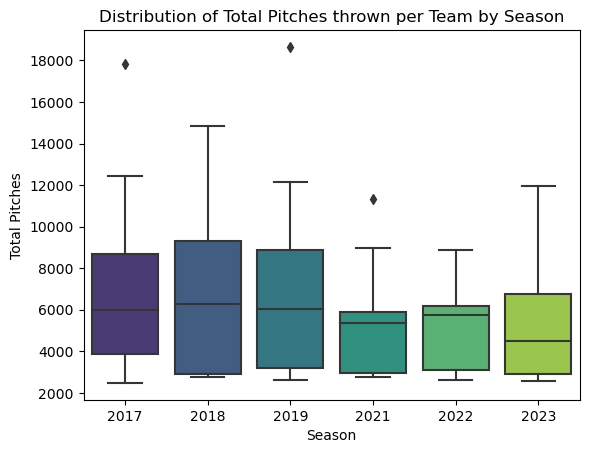

In [39]:
# examining total pitches thrown across the league by season
team_pitches = cleaned_pitching.groupby(['Season', 'Team'])['Pitches'].sum().reset_index()

sns.set_palette('viridis')
sns.boxplot(x = 'Season', y = 'Pitches', data = team_pitches)
plt.ylabel('Total Pitches')
plt.title('Distribution of Total Pitches thrown per Team by Season')
plt.show()